In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
hours = np.random.uniform(1, 10, 100)
score = 60 + 2*hours + np.random.normal(loc=0, scale=.45*hours, size=100)

In [3]:
df = pd.DataFrame({'hours': hours, 'score': score})

In [4]:
df.head()

,hours,score
0,7.333311,76.939803
1,9.159721,81.480507
2,4.442872,70.048234
3,8.886814,84.453660
4,2.717677,66.098530


In [5]:
model = smf.quantreg('score ~ hours', df).fit(q=0.85)

In [6]:
print(model.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  score   Pseudo R-squared:               0.6108
Model:                       QuantReg   Bandwidth:                       3.121
Method:                 Least Squares   Sparsity:                        10.15
Date:                Fri, 29 Jan 2021   No. Observations:                  100
Time:                        10:17:55   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.7639      0.891     67.099      0.000      57.996      61.531
hours          2.6448      0.153     17.240      0.000       2.340       2.949


Text(0, 0.5, 'Exam Score')

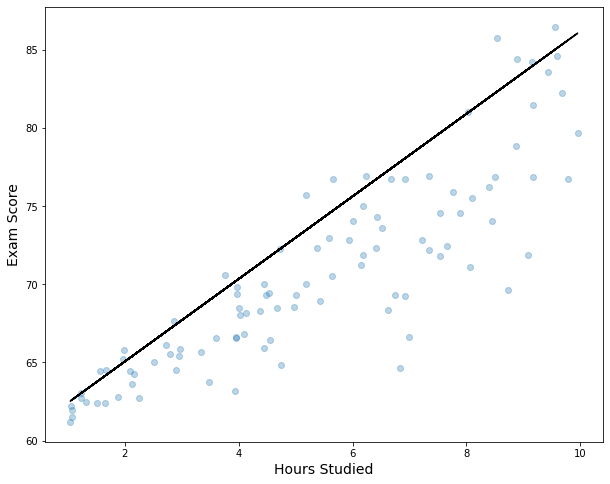

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

get_y = lambda a, b: a + b * hours
y = get_y(model.params['Intercept'], model.params['hours'])

ax.plot(hours, y, color='black')
ax.scatter(hours, score, alpha=.3)
ax.set_xlabel('Hours Studied', fontsize=14)
ax.set_ylabel('Exam Score', fontsize=14)